In [1]:
import pandas as pd
import protfasta
import glob

# Preparing input script

In [13]:
interpro = pd.read_csv("../data/interpro_tf_doms_7-21-25.csv")
interpro_codes = interpro["Interpro domain code"].str.strip().drop_duplicates()
interpro_codes

0     IPR013087
2     IPR001356
3     IPR011598
4     IPR004827
5     IPR001766
6     IPR000536
7     IPR009071
8     IPR000418
9     IPR046360
10    IPR017956
11    IPR000327
12    IPR024752
13    IPR006612
14    IPR006600
15    IPR036388
16    IPR003656
17    IPR000679
18    IPR011539
19    IPR001132
20    IPR000770
21    IPR002857
22    IPR001346
23    IPR001739
24    IPR003150
25    IPR000232
26    IPR001275
27    IPR003350
28    IPR013801
29    IPR001606
30    IPR057520
31    IPR002100
32    IPR011129
33    IPR013854
34    IPR000818
35    IPR003690
36    IPR032200
37    IPR001523
38    IPR004212
39    IPR041686
40    IPR006578
41    IPR012295
42    IPR011615
43    IPR013524
44    IPR015351
45    IPR007889
46    IPR023082
47       Q12986
48    IPR024061
49    IPR003902
50    IPR005559
51    IPR033467
52    IPR018586
53    IPR003958
54    IPR007588
Name: Interpro domain code, dtype: object

In [8]:
# Ran from scripts folder
print("python3 script-InterPro-parallelized.py " + " ".join(interpro_codes))

python3 script-InterPro-parallelized.py IPR013087 IPR001356 IPR011598 IPR004827 IPR001766 IPR000536 IPR009071 IPR000418 IPR046360 IPR017956 IPR000327 IPR024752 IPR006612 IPR006600 IPR036388 IPR003656 IPR000679 IPR011539 IPR001132 IPR000770 IPR002857 IPR001346 IPR001739 IPR003150 IPR000232 IPR001275 IPR003350 IPR013801 IPR001606 IPR057520 IPR002100 IPR011129 IPR013854 IPR000818 IPR003690 IPR032200 IPR001523 IPR004212 IPR041686 IPR006578 IPR012295 IPR011615 IPR013524 IPR015351 IPR007889 IPR023082 Q12986 IPR024061 IPR003902 IPR005559 IPR033467 IPR018586 IPR003958 IPR007588


In [9]:
len(interpro_codes)

54

In [3]:
# IPR000967 instead of Q12986
# So ran script-INterPro-modified to get fasta

# How many input sequences?

In [16]:
all_dfs = []

for path in glob.glob("../output/interpro/*"):
    fasta_dict = protfasta.read_fasta(path, invalid_sequence_action = 'remove')
    path_df = pd.DataFrame({"path" : path, "id" : fasta_dict.keys(), "seq" : fasta_dict.values()})
    all_dfs.append(path_df)

all_dfs = pd.concat(all_dfs)
all_dfs["Interpro domain code"] = all_dfs["path"].str.split("/").str[-1].str.split(".").str[0]
all_dfs

path  \
0   ../output/interpro/IPR000327.fasta   
1   ../output/interpro/IPR000327.fasta   
2   ../output/interpro/IPR000327.fasta   
3   ../output/interpro/IPR000327.fasta   
4   ../output/interpro/IPR000327.fasta   
..                                 ...   
26  ../output/interpro/IPR006600.fasta   
27  ../output/interpro/IPR006600.fasta   
28  ../output/interpro/IPR006600.fasta   
29  ../output/interpro/IPR006600.fasta   
30  ../output/interpro/IPR006600.fasta   

                                                   id  \
0   A0A1L8FFY5|IPR000327(161...235)|POU domain, cl...   
1   A1L0Z1|IPR000327(185...259)|POU domain, class ...   
2   A7Y7W2|IPR000327(170...244)|POU domain, class ...   
3   B3DM23|IPR000327(207...281)|POU domain, class ...   
4   B3DM25|IPR000327(232...306)|POU domain, class ...   
..                                                ...   
26  Q8BZH4|IPR006600(1011...1081)|Pogo transposabl...   
27  Q8IY51|IPR006600(75...146)|Tigger transposable...   
28  Q96MW7|IPR006600(70...149)|Tigger transposable...   
29  Q9P215|IPR006600(250...323)|Pogo transposable ...   
30  Q9Y4A0|IPR006600(67...139)|Jerky protein homol...   

                                                  seq Interpro domain code  
0   MTREPDSTVEQQHGNGHLENGTEQDTLDFSRQIKTEDLSEALQTGI...            IPR000327  
1   MATAASNPYSILSSSSLVHDSAIMQQGSPFRNPQKLLQSDYLQGVP...            IPR000327  
2   MFSPDGGLPAAPFGLLPDGGPPFPRGGYDGAAAQQLFFPFASEPDG...            IPR000327  
3   MDQPVLYNQPAFPNFSYSPGLGQEGGNYQYLGNYNAPSYPQPFFHV...            IPR000327  
4   MYSQQPFPPFAFNAGLIQDPANCHFGGYTGLGHPQPFSFAFSTLKS...            IPR000327  
..                                                ...                  ...  
26  MADTDLFMECEEEELEPWQKISDVIEDSVVEDYNSVDKTTSVSVSQ...            IPR006600  
27  MAEASVDASTLPVTVKKKKSLSIEEKIDIINAVESGKKKAEIAAEY...            IPR006600  
28  MASKCSSERKSRTSLTLNQKLEMIKLSEEGMSKAEIGRRLGLLRQT...            IPR006600  
29  MESTAYPLNLSLKEEEEEEEIQSRELEDGPADMQKVRICSEGGWVP...            IPR006600  
30  MSGKRKRVVLTIKDKLDIIKKLEDGGSSKQLAVIYGIGETTVRDIR...            IPR006600  

[14493 rows x 4 columns]

In [19]:
import seaborn as sns

<Axes: xlabel='Interpro domain code', ylabel='count'>

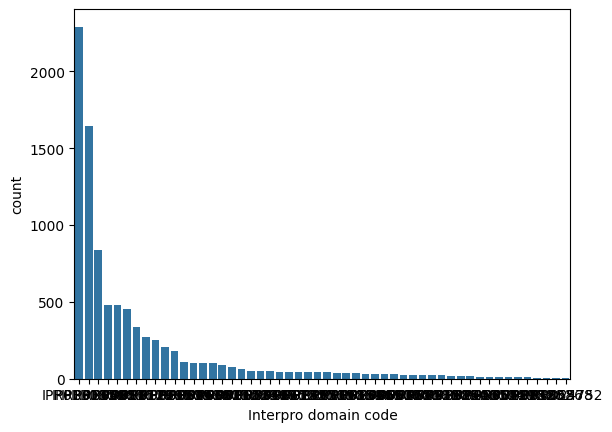

In [20]:
sns.barplot(pd.merge(all_dfs, interpro_codes, on = "Interpro domain code")["Interpro domain code"].value_counts())

In [ ]:
# Fix the one wrong entry